In [63]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression    ##for linear_regression
from sklearn.neighbors import KNeighborsRegressor       ##for knn regression
from sklearn.tree import DecisionTreeRegressor          ##for DecisionTreeRegression
from sklearn.ensemble import RandomForestRegressor       ##RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

###storing the best acc. value: by using pickle
import pickle

sns.set()

In [64]:
##import data to read
train_data = pd.read_csv('train-data.csv')
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [65]:
##test data:
test_data = pd.read_csv('test-data.csv' )
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [67]:
##find mean values:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [68]:
###no. of rows and columns:
train_data.shape

(6019, 14)

In [69]:
###column names :
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [70]:
##find null values:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [71]:
##Let's Drop sum Rows which contains NULL values.
##ignored New_Price as there are many cell which contains NULL value in this column.
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 14)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 14)


In [72]:
###reset the index values after dropping columns:
train_data = train_data.reset_index(drop=True)

for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [73]:
##convert to float type
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [74]:
##Power(bhp) to float an error occured (Can't convert str to float : null)
print(train_data['Power'][76])

null bhp


In [75]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print("\n\n dislplay x :"  , x)
print("\n\n count : " ,count)
print("\n\n position :" ,position)



 dislplay x : Y


 count :  103


 position : [76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [76]:
##data rows and colummn:
print("\n\n rows and column : " ,train_data.shape)



 rows and column :  (5975, 18)


In [77]:
###reset index:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [78]:
##data rows and colummn:
print("\n\n rows and column : " ,train_data.shape)



 rows and column :  (5872, 18)


In [79]:
##convert power(bhp) to float:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [80]:
###display data head:
print("\n\n\n data head : \n " ,train_data.head())




 data head : 
     Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  Company  Mileage(km/kg)  Engine(CC)  \
0  58.16 bhp 

In [81]:
####full new_price to new_car_price:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [82]:
##convert str to float:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [83]:
###drop columns:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)
train_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [84]:
###to avoid variations in data drop Company column
train_data.drop(["Company"],axis=1,inplace=True)
train_data.drop(["Location"],axis=1,inplace=True)
print(train_data.columns)

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Seats', 'Price', 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'New_car_Price'],
      dtype='object')


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


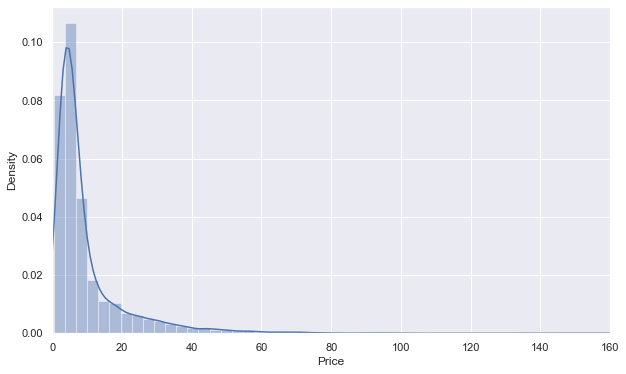

In [85]:
# Data Visualization
###visulization on price
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(train_data['Price'])
plt.xlim([0,160])
plt.show()

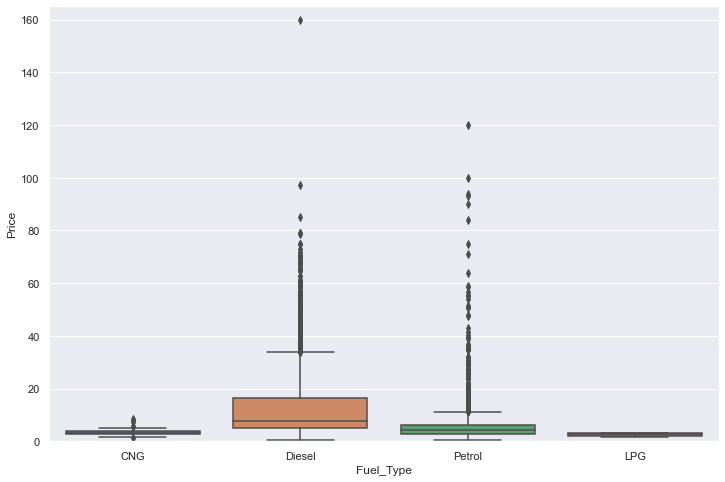

In [86]:
##Fuel Type
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.show()

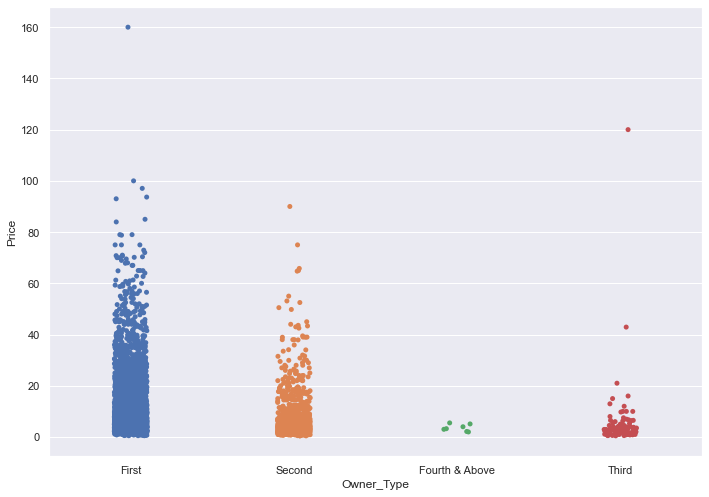

In [87]:
###owner type:
var ='Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data)
plt.show()

In [88]:
##data info:
print("\n\n data info : \n" , train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Seats              5872 non-null   float64
 6   Price              5872 non-null   float64
 7   Mileage(km/kg)     5872 non-null   float64
 8   Engine(CC)         5872 non-null   float64
 9   Power(bhp)         5872 non-null   float64
 10  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 504.8+ KB


 data info : 
 None


In [89]:
##Working for Fuel_Type:
print("\n\n fuel type value count :\n" ,train_data['Fuel_Type'].value_counts())



 fuel type value count :
 Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64


In [90]:
##onehot code:
Fuel_t = train_data['Fuel_Type']
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
print("\n\n fuel type: \n ",Fuel_t.head())



 fuel type: 
     Diesel  LPG  Petrol
0       0    0       0
1       1    0       0
2       0    0       1
3       1    0       0
4       1    0       0


In [91]:
### Working with Transmission
print("\n\n transmissoin value count : \n" ,train_data['Transmission'].value_counts())



 transmissoin value count : 
 Manual       4170
Automatic    1702
Name: Transmission, dtype: int64


In [92]:
##by applying one hot coding:
Transmission_ = train_data['Transmission']
Transmission_ = pd.get_dummies(Transmission_,drop_first=True)
print("\n\n transmission columns :\n " ,Transmission_.head())



 transmission columns :
     Manual
0       1
1       1
2       1
3       1
4       0


In [93]:
### Working with Owner_Type
print("\n\n owner values counts : \n" , train_data['Owner_Type'].value_counts())



 owner values counts : 
 First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64


In [94]:
##by applyin label encode:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)

In [95]:
###for check display data:
print(train_data['Owner_Type'].head())

0    1
1    1
2    1
3    1
4    2
Name: Owner_Type, dtype: int64


In [96]:
###final dataset:
final_train = pd.concat([train_data,Fuel_t,Transmission_],axis=1)
print("\n\n final data :\n " ,final_train.head())



 final data :
     Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  Seats  Price  \
0  2010              72000       CNG       Manual           1    5.0   1.75   
1  2015              41000    Diesel       Manual           1    5.0  12.50   
2  2011              46000    Petrol       Manual           1    5.0   4.50   
3  2012              87000    Diesel       Manual           1    7.0   6.00   
4  2013              40670    Diesel    Automatic           2    5.0  17.74   

   Mileage(km/kg)  Engine(CC)  Power(bhp)  New_car_Price  Diesel  LPG  Petrol  \
0           26.60       998.0       58.16            NaN       0    0       0   
1           19.67      1582.0      126.20            NaN       1    0       0   
2           18.20      1199.0       88.70           8.61       0    0       1   
3           20.77      1248.0       88.76            NaN       1    0       0   
4           15.20      1968.0      140.80            NaN       1    0       0   

   Manual  
0       

In [97]:
##drop clumns:
final_train.drop(["Fuel_Type","Transmission" ,"New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Diesel,LPG,Petrol,Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,1,0,0,0


In [98]:
###shape of final data:
print("\n\n final data rows ,column : \n ", final_train.shape)



 final data rows ,column : 
  (5872, 12)


In [99]:
###export to new csv file:
from pandas import DataFrame
DataFrame(final_train.to_csv("updatedataset.csv", index=False,header=True))

print("successfully data updated")

successfully data updated


In [100]:
# import dataset
data = pd.read_csv('updatedataset.csv')
print("\n\n dispalay data : \n " , data.head())



 dispalay data : 
     Year  Kilometers_Driven  Owner_Type  Seats  Price  Mileage(km/kg)  \
0  2010              72000           1    5.0   1.75           26.60   
1  2015              41000           1    5.0  12.50           19.67   
2  2011              46000           1    5.0   4.50           18.20   
3  2012              87000           1    7.0   6.00           20.77   
4  2013              40670           2    5.0  17.74           15.20   

   Engine(CC)  Power(bhp)  Diesel  LPG  Petrol  Manual  
0       998.0       58.16       0    0       0       1  
1      1582.0      126.20       1    0       0       1  
2      1199.0       88.70       0    0       1       1  
3      1248.0       88.76       1    0       0       1  
4      1968.0      140.80       1    0       0       0  


In [101]:
###data columns:
print("\n\n data columns : \n " ,data.columns)



 data columns : 
  Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Diesel', 'LPG', 'Petrol',
       'Manual'],
      dtype='object')


In [102]:
###separate row and columns:
x = data.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
                 'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Diesel',
                 'LPG', 'Petrol','Manual']]

In [103]:
y = data.loc[: ,['Price']]

In [104]:
print("\n\n x shape : \n" , x.shape)



 x shape : 
 (5872, 11)


In [105]:
###cinvert into array format:
x = np.array(x)
y = np.array(y)

In [106]:
# check x, y
print(x)
print(y)

[[2.010e+03 7.200e+04 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.015e+03 4.100e+04 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.011e+03 4.600e+04 1.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [2.012e+03 5.500e+04 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.013e+03 4.600e+04 1.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [2.011e+03 4.700e+04 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]
[[ 1.75]
 [12.5 ]
 [ 4.5 ]
 ...
 [ 2.9 ]
 [ 2.65]
 [ 2.5 ]]


In [107]:
# split test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [108]:
# check train and test data length
print("x_test :",  len(x_test))
print("y_test :",  len(y_test))
print("x_trian :", len(x_train))
print("y_trian :", len(y_train))

x_test : 1175
y_test : 1175
x_trian : 4697
y_trian : 4697


In [109]:
##apply algorithms:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
acc =  linear_regression.score(x_test, y_test)
print("Linar Regression : ", acc)

Linar Regression :  0.7082751425518293


In [110]:
##apply k-nearest neighbours:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train , y_train)
acc = knn.score(x_test , y_test)
print("knn acc : " , acc)

knn acc :  0.5562233729287134


In [111]:
##apply DecisionTreeRegressor
dtregression = DecisionTreeRegressor()
dtregression.fit(x_train , y_train)
acc = dtregression.score(x_test , y_test)
print("decision tree regression acc :" , acc)

decision tree regression acc : 0.857134561721751


In [112]:
##apply Random forest regression:
rf_regression = RandomForestRegressor()
rf_regression.fit(x_train , y_train)
acc = rf_regression.score(x_test, y_test)
print("random forest regression acc :" , acc)


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


random forest regression acc : 0.9033766303077493


In [113]:
##apply support vector machine regression:
svm_regression = SVR()
svm_regression.fit(x_train , y_train)
acc = svm_regression.score(x_test , y_test)
print("svm_regression acc :" , acc)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


svm_regression acc : -0.07572802145652258


In [114]:
##svm by linear regressipn :
svmlinear_regression = LinearSVR()
svmlinear_regression.fit(x_train , y_train)
acc = svmlinear_regression.score(x_test , y_test)
print("svmlinear_regression acc :" , acc)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


svmlinear_regression acc : -0.5836628614032786


In [115]:
##apply algorithms:
bestscore_lr = 0
for i in range(1000):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    acc =  linear_regression.score(x_test, y_test)
    print("\n\n i - count :" , i , "acc:" ,acc ,end="")
    if bestscore_lr < acc:
        bestscore_lr = acc
        print("Linar Regression : ", bestscore_lr)
        with open("lr.pickle" , "wb")as lr_file:
            pickle.dump(linear_regression , lr_file)



 i - count : 0 acc: 0.726180875193914Linar Regression :  0.726180875193914


 i - count : 1 acc: 0.7149480899572184

 i - count : 2 acc: 0.5080452020000312

 i - count : 3 acc: 0.7318942737221512Linar Regression :  0.7318942737221512


 i - count : 4 acc: 0.5020050278063387

 i - count : 5 acc: 0.7186695445898756

 i - count : 6 acc: 0.7102788581859654

 i - count : 7 acc: 0.7219660648145785

 i - count : 8 acc: 0.7219008288869779

 i - count : 9 acc: 0.7044998012417925

 i - count : 10 acc: 0.7081150353022438

 i - count : 11 acc: 0.7210996881180317

 i - count : 12 acc: 0.6693867438534453

 i - count : 13 acc: 0.7128833732520952

 i - count : 14 acc: 0.6967696239396926

 i - count : 15 acc: 0.690825936079315

 i - count : 16 acc: 0.46344447116391974

 i - count : 17 acc: 0.6972160668210847

 i - count : 18 acc: 0.7299208483447095

 i - count : 19 acc: 0.5522324535939265

 i - count : 20 acc: 0.5174051758839896

 i - count : 21 acc: 0.7260468108022022

 i - count : 22 acc: 0.7281353

 i - count : 198 acc: 0.704367019540165

 i - count : 199 acc: 0.557395267165042

 i - count : 200 acc: 0.6513808509267495

 i - count : 201 acc: 0.6844290036912519

 i - count : 202 acc: 0.4899114403799827

 i - count : 203 acc: 0.45153327170464397

 i - count : 204 acc: 0.718235566948058

 i - count : 205 acc: 0.6817054308166499

 i - count : 206 acc: 0.6527055184940509

 i - count : 207 acc: 0.7110172464586857

 i - count : 208 acc: 0.7003480770385981

 i - count : 209 acc: 0.688939792142182

 i - count : 210 acc: 0.6970390336235128

 i - count : 211 acc: 0.6895821804137334

 i - count : 212 acc: 0.6924619922320885

 i - count : 213 acc: 0.6853206640680345

 i - count : 214 acc: 0.711636926017476

 i - count : 215 acc: 0.7292744524256527

 i - count : 216 acc: 0.6507235128314957

 i - count : 217 acc: 0.6959465250470656

 i - count : 218 acc: 0.45671304254644596

 i - count : 219 acc: 0.7084631214041541

 i - count : 220 acc: 0.6750793412225254

 i - count : 221 acc: 0.7029212720836

 i - count : 401 acc: 0.6528327739958575

 i - count : 402 acc: 0.6938712122146474

 i - count : 403 acc: 0.6813931619079795

 i - count : 404 acc: 0.7157302767072818

 i - count : 405 acc: 0.43763903573532215

 i - count : 406 acc: 0.7188299537050022

 i - count : 407 acc: 0.6693628959462176

 i - count : 408 acc: 0.716843495501786

 i - count : 409 acc: 0.7047663128626616

 i - count : 410 acc: 0.6737047658732942

 i - count : 411 acc: 0.7187553344376387

 i - count : 412 acc: 0.669517734071255

 i - count : 413 acc: 0.6895700074686228

 i - count : 414 acc: 0.6926303638866357

 i - count : 415 acc: 0.7367399542260247

 i - count : 416 acc: 0.714178275536429

 i - count : 417 acc: 0.663955249056936

 i - count : 418 acc: 0.7044870160872196

 i - count : 419 acc: 0.6572849167686855

 i - count : 420 acc: 0.6622271326130961

 i - count : 421 acc: 0.7051946458826436

 i - count : 422 acc: 0.5385204229002393

 i - count : 423 acc: 0.4769144031926329

 i - count : 424 acc: 0.6961591651601

 i - count : 612 acc: 0.4972807807646217

 i - count : 613 acc: 0.7174229768499474

 i - count : 614 acc: 0.7234868580374689

 i - count : 615 acc: 0.7047139067148469

 i - count : 616 acc: 0.724474272428718

 i - count : 617 acc: 0.7194681178104727

 i - count : 618 acc: 0.637830681231363

 i - count : 619 acc: 0.6442230740490444

 i - count : 620 acc: 0.699199470855052

 i - count : 621 acc: 0.7045372913229728

 i - count : 622 acc: 0.732495219917727

 i - count : 623 acc: 0.6626053670384386

 i - count : 624 acc: 0.6436228798015451

 i - count : 625 acc: 0.5366407228786407

 i - count : 626 acc: 0.7018152387737375

 i - count : 627 acc: 0.7277185768971293

 i - count : 628 acc: 0.5341293347184033

 i - count : 629 acc: 0.5147376248792397

 i - count : 630 acc: 0.6925470603228137

 i - count : 631 acc: 0.7004733925786297

 i - count : 632 acc: 0.7179290038354968

 i - count : 633 acc: 0.6487340234337009

 i - count : 634 acc: 0.7063243066444305

 i - count : 635 acc: 0.71589746455680

 i - count : 823 acc: 0.6720234164710319

 i - count : 824 acc: 0.5434071715060513

 i - count : 825 acc: 0.5178020307238214

 i - count : 826 acc: 0.4554383044952407

 i - count : 827 acc: 0.7170111910454033

 i - count : 828 acc: 0.7218919656673444

 i - count : 829 acc: 0.5340460633785163

 i - count : 830 acc: 0.7325774813696881

 i - count : 831 acc: 0.6958638153981017

 i - count : 832 acc: 0.6660444332869262

 i - count : 833 acc: 0.7095091603526728

 i - count : 834 acc: 0.6840700680854255

 i - count : 835 acc: 0.48290770658080184

 i - count : 836 acc: 0.7252798246997751

 i - count : 837 acc: 0.7217661472921002

 i - count : 838 acc: 0.7059575467608712

 i - count : 839 acc: 0.7109280218525804

 i - count : 840 acc: 0.7056586310416086

 i - count : 841 acc: 0.632977350374968

 i - count : 842 acc: 0.6894680650295899

 i - count : 843 acc: 0.6849713757401248

 i - count : 844 acc: 0.6958871544942871

 i - count : 845 acc: 0.4926666571415078

 i - count : 846 acc: 0.7065680048

In [116]:
##apply Random forest regression:

bestscore_rf = 0
for j in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    rf_regression = RandomForestRegressor()
    rf_regression.fit(x_train , y_train)
    acc = rf_regression.score(x_test, y_test)
    print("\n\n  j - count : " ,j ,"acc : " ,acc,end="")
    if bestscore_rf < acc:
        bestscore_rf = acc
        print("\n ------------------------>random forest regression acc :" , bestscore_rf)
        with open("randomforest.pickle" , "wb") as rf_file:
            pickle.dump(rf_regression , rf_file)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  0 acc :  0.8959440657368659
 ------------------------>random forest regression acc : 0.8959440657368659


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  1 acc :  0.8624961151545324

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  2 acc :  0.8587502192496165

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  3 acc :  0.9074445760389882
 ------------------------>random forest regression acc : 0.9074445760389882


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  4 acc :  0.8977444980405602

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  5 acc :  0.8945747417939633

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  6 acc :  0.874110854904204

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  7 acc :  0.9147929734986694
 ------------------------>random forest regression acc : 0.9147929734986694


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  8 acc :  0.9081958089880662

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  9 acc :  0.9169806026552767
 ------------------------>random forest regression acc : 0.9169806026552767


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  10 acc :  0.8822863287014295

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  11 acc :  0.9309692376082234
 ------------------------>random forest regression acc : 0.9309692376082234


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  12 acc :  0.8888300291928926

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  13 acc :  0.8998183011957194

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  14 acc :  0.9056877327596393

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  15 acc :  0.9121591933908245

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  16 acc :  0.9007675472534353

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  17 acc :  0.9142884536993214

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  18 acc :  0.9087669106951414

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  19 acc :  0.9058325021616246

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  20 acc :  0.8226579797670475

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  21 acc :  0.8409014512487054

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  22 acc :  0.862095988153379

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  23 acc :  0.904700746837666

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  24 acc :  0.8424423939290129

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  25 acc :  0.8383978207905415

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  26 acc :  0.9057713226285513

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  27 acc :  0.8494884738886944

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  28 acc :  0.9098468797131825

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  29 acc :  0.8640639977424573

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  30 acc :  0.9033650020309136

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  31 acc :  0.8984521689347895

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  32 acc :  0.8427626283605886

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  33 acc :  0.8915560786985206

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  34 acc :  0.8965903298879389

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  35 acc :  0.8448383606971253

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  36 acc :  0.828216610264346

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  37 acc :  0.9035264687954193

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  38 acc :  0.9140421676636487

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  39 acc :  0.9100922306663656

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  40 acc :  0.9235551498835542

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  41 acc :  0.881105338545971

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  42 acc :  0.8970048925357539

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  43 acc :  0.9134798515129379

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  44 acc :  0.9146647565491686

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  45 acc :  0.8439522062595467

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  46 acc :  0.9182400610714399

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  47 acc :  0.8997845345880913

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  48 acc :  0.9040880257701903

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  49 acc :  0.8559062423048653

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  50 acc :  0.9156649942274304

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  51 acc :  0.8541388556930138

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  52 acc :  0.8467864400604342

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  53 acc :  0.9201543489367774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  54 acc :  0.8661181704111819

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  55 acc :  0.865329859746613

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  56 acc :  0.9118544814311159

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  57 acc :  0.9065608415849755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  58 acc :  0.906858166070514

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  59 acc :  0.9233966704507429

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  60 acc :  0.9030178451085368

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  61 acc :  0.9024673586974767

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  62 acc :  0.865879083562793

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  63 acc :  0.9121269229264656

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  64 acc :  0.8519335446816638

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  65 acc :  0.8457512378911428

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  66 acc :  0.9118484428826996

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  67 acc :  0.8332079472661679

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  68 acc :  0.8777385860112497

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  69 acc :  0.907529035316696

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  70 acc :  0.9165912656453437

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  71 acc :  0.8956754379665594

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  72 acc :  0.8468733685401536

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  73 acc :  0.8906165760827247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  74 acc :  0.8719314055770133

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  75 acc :  0.8847864701284389

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  76 acc :  0.868142980605162

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  77 acc :  0.9021827069752171

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  78 acc :  0.8836887941903587

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  79 acc :  0.9044497778588636

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  80 acc :  0.9010863515534386

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  81 acc :  0.8435016941395193

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  82 acc :  0.8708226889873643

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  83 acc :  0.8443893256271076

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  84 acc :  0.9108753931249551

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  85 acc :  0.8826478284096099

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  86 acc :  0.9143198881888823

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  87 acc :  0.9163596703104755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  88 acc :  0.911981473356828

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  89 acc :  0.900167668448193

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  90 acc :  0.8457862910070332

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  91 acc :  0.8893580715785915

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  92 acc :  0.9083026341648206

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  93 acc :  0.8803523403055538

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  94 acc :  0.8942095285937659

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  95 acc :  0.8840154370163139

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  96 acc :  0.8896555935274613

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  97 acc :  0.9000445154637624

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  98 acc :  0.8582357233345695

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  99 acc :  0.8659535908344574

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  100 acc :  0.9069127883286267

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  101 acc :  0.8516835607189132

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  102 acc :  0.8568467185460341

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  103 acc :  0.9118383941176964

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  104 acc :  0.9124724983976052

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  105 acc :  0.8526840047177807

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  106 acc :  0.8736359561813918

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  107 acc :  0.9080974961494055

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  108 acc :  0.9136491143926408

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  109 acc :  0.8517213865546278

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  110 acc :  0.8750603293869496

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  111 acc :  0.8983129021792325

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  112 acc :  0.9229314603006614

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  113 acc :  0.8892052076785706

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  114 acc :  0.916380106168142

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  115 acc :  0.8837127078653392

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  116 acc :  0.91678319994116

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  117 acc :  0.822539769834579

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  118 acc :  0.9243399472263517

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  119 acc :  0.9282133330614554

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  120 acc :  0.8661644811117799

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  121 acc :  0.8775028512044046

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  122 acc :  0.9061125730162769

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  123 acc :  0.9033219168361344

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  124 acc :  0.8465717731670309

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  125 acc :  0.8583659029940398

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  126 acc :  0.8242506830059569

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  127 acc :  0.906287046626837

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  128 acc :  0.8135207698448966

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  129 acc :  0.902750149498951

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  130 acc :  0.8508937146728747

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  131 acc :  0.8331327904048926

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  132 acc :  0.8669827615612145

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  133 acc :  0.900393010662229

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  134 acc :  0.8841471285008612

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  135 acc :  0.8864312580620457

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  136 acc :  0.869320073752356

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  137 acc :  0.909346141812873

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  138 acc :  0.9217832412626955

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  139 acc :  0.8566885126793866

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  140 acc :  0.9207927281879889

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  141 acc :  0.8940026181239913

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  142 acc :  0.8423131335704886

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  143 acc :  0.9140757491868284

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  144 acc :  0.8318229473414309

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  145 acc :  0.8767522991381665

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  146 acc :  0.8425717824367496

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  147 acc :  0.8975799588894275

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  148 acc :  0.9161670001522049

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  149 acc :  0.9149874628372915

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  150 acc :  0.8718827567511076

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  151 acc :  0.8926274774382841

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  152 acc :  0.8438333928946944

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  153 acc :  0.8399508534750755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  154 acc :  0.8319967044573846

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  155 acc :  0.8629437704361637

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  156 acc :  0.8730417188041941

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  157 acc :  0.8910076875067574

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  158 acc :  0.8935021354743891

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  159 acc :  0.8117955636834724

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  160 acc :  0.861747050251639

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  161 acc :  0.9078144053540432

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  162 acc :  0.8540158951414372

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  163 acc :  0.8904577572114117

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  164 acc :  0.9232790896492067

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  165 acc :  0.8915766533356704

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  166 acc :  0.8519700059079002

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  167 acc :  0.9105624683022222

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  168 acc :  0.8591694423392909

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  169 acc :  0.9006401765684839

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  170 acc :  0.8933838744163204

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  171 acc :  0.8634722645318822

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  172 acc :  0.8995155571621756

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  173 acc :  0.9124233160517741

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  174 acc :  0.8850229950455641

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  175 acc :  0.9069280047114928

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  176 acc :  0.894167553164111

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  177 acc :  0.9149688928378376

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  178 acc :  0.8983380081110857

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  179 acc :  0.8944256754497235

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  180 acc :  0.8513663431196865

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  181 acc :  0.9179084991744741

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  182 acc :  0.9147205910416542

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  183 acc :  0.8244443007021671

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  184 acc :  0.8580842181513937

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  185 acc :  0.8629667547278475

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  186 acc :  0.9214996903452367

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  187 acc :  0.8686926867079462

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  188 acc :  0.8572009932387017

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  189 acc :  0.8981379608281119

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  190 acc :  0.9131925174178479

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  191 acc :  0.8734192746385763

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  192 acc :  0.9096271477024674

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  193 acc :  0.8609848754424984

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  194 acc :  0.9009690201933789

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  195 acc :  0.8495407593351012

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  196 acc :  0.8384792331585149

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  197 acc :  0.8748186424630188

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  198 acc :  0.9232247004023579

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  199 acc :  0.8476679325522261

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  200 acc :  0.8409279940899259

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  201 acc :  0.8385126939428622

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  202 acc :  0.9105407075815481

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  203 acc :  0.8790537298512864

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  204 acc :  0.8687108679458059

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  205 acc :  0.9169947269427329

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  206 acc :  0.8657152202770148

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  207 acc :  0.8267910626249906

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  208 acc :  0.867852446711242

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  209 acc :  0.9086922585574524

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  210 acc :  0.9286700069027936

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  211 acc :  0.9006720330127644

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  212 acc :  0.9056022431056693

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  213 acc :  0.9091888577727849

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  214 acc :  0.8652222011417637

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  215 acc :  0.8366055141987678

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  216 acc :  0.881916557662248

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  217 acc :  0.9289594602893095

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  218 acc :  0.8668032199348958

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  219 acc :  0.8707067443630828

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  220 acc :  0.8564361596331614

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  221 acc :  0.8632490651705229

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  222 acc :  0.9151366342556415

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  223 acc :  0.8429417710916247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  224 acc :  0.828703396042122

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  225 acc :  0.8684134788189617

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  226 acc :  0.9137491028785745

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  227 acc :  0.8791846332243226

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  228 acc :  0.8745831797069913

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  229 acc :  0.9172096206915634

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  230 acc :  0.8998997403324899

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  231 acc :  0.9014557532790097

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  232 acc :  0.9147086510208338

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  233 acc :  0.8594467877644909

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  234 acc :  0.866406811943748

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  235 acc :  0.9104427253362041

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  236 acc :  0.8298292878018474

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  237 acc :  0.9134818952899713

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  238 acc :  0.8908675415054811

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  239 acc :  0.9217710786024974

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  240 acc :  0.9139230874032676

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  241 acc :  0.8992185141532728

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  242 acc :  0.9137366430545236

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  243 acc :  0.9147334979889679

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  244 acc :  0.8342124825318303

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  245 acc :  0.9118101957003037

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  246 acc :  0.8154903401133968

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  247 acc :  0.8440852393416873

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  248 acc :  0.838582230748793

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  249 acc :  0.8891723199687639

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  250 acc :  0.8439153341889787

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  251 acc :  0.9155698448552405

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  252 acc :  0.9028986810890437

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  253 acc :  0.8231214904157687

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  254 acc :  0.8856696476580939

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  255 acc :  0.9100268476448379

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  256 acc :  0.8467767718830606

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  257 acc :  0.911406932033447

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  258 acc :  0.883895280613376

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  259 acc :  0.8604853317626049

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  260 acc :  0.9080578778710386

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  261 acc :  0.9148708112684176

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  262 acc :  0.8829513747610039

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  263 acc :  0.8904641204529895

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  264 acc :  0.8969507630408843

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  265 acc :  0.8979182966385603

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  266 acc :  0.8924215915396244

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  267 acc :  0.8952676407874084

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  268 acc :  0.916374201292782

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  269 acc :  0.8744186012957857

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  270 acc :  0.8655261101758607

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  271 acc :  0.8892171331731666

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  272 acc :  0.8528058669467093

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  273 acc :  0.9163859526746736

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  274 acc :  0.8484869661187093

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  275 acc :  0.9152740087546752

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  276 acc :  0.8954254796013055

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  277 acc :  0.8946972144362461

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  278 acc :  0.8281688544774447

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  279 acc :  0.8520708932061511

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  280 acc :  0.908517062373251

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  281 acc :  0.8874814251748195

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  282 acc :  0.825232797252909

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  283 acc :  0.8421864711547513

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  284 acc :  0.9019966951898549

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  285 acc :  0.8905228184295597

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  286 acc :  0.8982961238816047

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  287 acc :  0.8431343640032818

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  288 acc :  0.8560780110305934

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  289 acc :  0.8933316549215251

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  290 acc :  0.8372546061564057

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  291 acc :  0.9021626901341713

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  292 acc :  0.8935282516206142

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  293 acc :  0.8910791576829247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  294 acc :  0.9033156775007019

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  295 acc :  0.8984412978666636

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  296 acc :  0.8552285331081884

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  297 acc :  0.8898579595100251

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  298 acc :  0.9080478043384359

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  299 acc :  0.8861277357399946

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  300 acc :  0.8105912662219004

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  301 acc :  0.9080973369957962

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  302 acc :  0.8796501469072653

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  303 acc :  0.90208878583523

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  304 acc :  0.9098291501100548

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  305 acc :  0.917227861485046

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  306 acc :  0.8461918876498761

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  307 acc :  0.9015423506707197

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  308 acc :  0.8945049036731203

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  309 acc :  0.9253501242634057

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  310 acc :  0.9067021069746624

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  311 acc :  0.8923237276095215

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  312 acc :  0.9264146736715226

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  313 acc :  0.9177065572032774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  314 acc :  0.8301337999457645

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  315 acc :  0.8920536650626837

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  316 acc :  0.9026233075092921

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  317 acc :  0.9065838089968034

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  318 acc :  0.8783596908264296

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  319 acc :  0.9004029334075956

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  320 acc :  0.856094742371463

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  321 acc :  0.8829914234610646

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  322 acc :  0.9206239851168972

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  323 acc :  0.9084615463161644

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  324 acc :  0.8747538515994038

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  325 acc :  0.8204995331865828

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  326 acc :  0.8820779890893057

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  327 acc :  0.9012288904540551

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  328 acc :  0.9095819289321356

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  329 acc :  0.9075273462965155

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  330 acc :  0.9126080092126054

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  331 acc :  0.8406152225625334

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  332 acc :  0.9137086342990862

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  333 acc :  0.876439690320502

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  334 acc :  0.8579943737694667

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  335 acc :  0.8496499738522887

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  336 acc :  0.8672973014539607

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  337 acc :  0.851841772006339

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  338 acc :  0.8922009983218996

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  339 acc :  0.8231431210459025

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  340 acc :  0.9138353892899175

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  341 acc :  0.8756288018626401

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  342 acc :  0.9036109583791944

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  343 acc :  0.8448967557990263

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  344 acc :  0.8815756625901048

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  345 acc :  0.8843396614508869

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  346 acc :  0.8286533806785163

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  347 acc :  0.8944047164236779

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  348 acc :  0.8895020979660709

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  349 acc :  0.8627055059865361

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  350 acc :  0.9048451077210519

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  351 acc :  0.8512388699478897

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  352 acc :  0.8717025195694897

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  353 acc :  0.8775411491879409

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  354 acc :  0.8239627659568702

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  355 acc :  0.9187777872178824

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  356 acc :  0.8950946779440282

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  357 acc :  0.8505354475113274

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  358 acc :  0.8680459404428111

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  359 acc :  0.84409695463676

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  360 acc :  0.9003118573943623

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  361 acc :  0.8696381485034175

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  362 acc :  0.9051048540632944

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  363 acc :  0.8719517008221277

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  364 acc :  0.8882664591261928

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  365 acc :  0.905701296235053

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  366 acc :  0.9034897649157129

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  367 acc :  0.8469674899679875

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  368 acc :  0.8629755768400555

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  369 acc :  0.8970459271104001

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  370 acc :  0.8942717205815456

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  371 acc :  0.9106443646885758

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  372 acc :  0.9134212951470312

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  373 acc :  0.9141096604230751

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  374 acc :  0.8468896915891496

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  375 acc :  0.8387600604762968

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  376 acc :  0.9186923064853634

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  377 acc :  0.857864343791056

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  378 acc :  0.9059584256069017

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  379 acc :  0.8720867565027086

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  380 acc :  0.90155063925273

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  381 acc :  0.9186744021347775

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  382 acc :  0.8900236105902377

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  383 acc :  0.8867116760657539

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  384 acc :  0.9113483657462607

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  385 acc :  0.8064767807111861

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  386 acc :  0.8968724713392923

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  387 acc :  0.9006399006918252

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  388 acc :  0.8878747025414515

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  389 acc :  0.8958925970732454

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  390 acc :  0.8719496294412736

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  391 acc :  0.8778465381211338

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  392 acc :  0.927826579093034

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  393 acc :  0.8883747134186915

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  394 acc :  0.8341935839044691

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  395 acc :  0.9093727589809393

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  396 acc :  0.9069547723325417

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  397 acc :  0.8814760583019455

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  398 acc :  0.8831063322707827

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  399 acc :  0.864270499589294

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  400 acc :  0.8515665912142228

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  401 acc :  0.9100279055720312

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  402 acc :  0.8182598229267624

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  403 acc :  0.799775457838282

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  404 acc :  0.8553314501096393

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  405 acc :  0.9183021513752458

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  406 acc :  0.9187011131798702

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  407 acc :  0.9006009692074717

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  408 acc :  0.904963067859462

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  409 acc :  0.8848671052865608

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  410 acc :  0.9239069270891312

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  411 acc :  0.8521561809748469

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  412 acc :  0.9026898202259376

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  413 acc :  0.9014118605302863

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  414 acc :  0.9104823910275731

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  415 acc :  0.9027504777934898

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  416 acc :  0.8749139268663432

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  417 acc :  0.8696002993014683

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  418 acc :  0.9097570708549443

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  419 acc :  0.8859806832334786

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  420 acc :  0.832127042787167

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  421 acc :  0.9328864117274623
 ------------------------>random forest regression acc : 0.9328864117274623


C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  422 acc :  0.9112094972256712

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  423 acc :  0.915970442574519

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  424 acc :  0.8987299474214336

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  425 acc :  0.9270967023240397

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  426 acc :  0.8717367228359305

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  427 acc :  0.9051281896542949

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  428 acc :  0.9182137007734148

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  429 acc :  0.8882536960540661

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  430 acc :  0.9170483599782799

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  431 acc :  0.828077851381689

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  432 acc :  0.869160245571723

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  433 acc :  0.9159930093564135

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  434 acc :  0.9142223460715022

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  435 acc :  0.8835869537477169

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  436 acc :  0.8462401765172626

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  437 acc :  0.9081126877536047

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  438 acc :  0.8919068963707161

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  439 acc :  0.8465982091002697

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  440 acc :  0.8862598421868828

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  441 acc :  0.8693129384116608

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  442 acc :  0.892206816236898

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  443 acc :  0.8952452540572283

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  444 acc :  0.9021032565263696

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  445 acc :  0.9183117380854516

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  446 acc :  0.8894329466560764

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  447 acc :  0.9210021914744576

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  448 acc :  0.9113682136502788

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  449 acc :  0.9132554959167007

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  450 acc :  0.9191737072998396

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  451 acc :  0.858154569375524

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  452 acc :  0.8749208402510774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  453 acc :  0.9173252626284536

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  454 acc :  0.9127516148328396

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  455 acc :  0.9278186218129357

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  456 acc :  0.9193752244560324

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  457 acc :  0.8618119678535188

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  458 acc :  0.9021215521245652

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  459 acc :  0.8384871403027567

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  460 acc :  0.8535642959423189

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  461 acc :  0.8413145914538382

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  462 acc :  0.9118350629420675

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  463 acc :  0.8891860289773096

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  464 acc :  0.8892277163614928

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  465 acc :  0.8656375209169564

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  466 acc :  0.8895466162907516

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  467 acc :  0.9184060944748382

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  468 acc :  0.8564105250742442

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  469 acc :  0.8359762668645884

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  470 acc :  0.8399495522933795

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  471 acc :  0.8862899836832052

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  472 acc :  0.8529184510031936

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  473 acc :  0.8925794062776083

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  474 acc :  0.9265456847913238

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  475 acc :  0.8533344663786787

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  476 acc :  0.8876208465013947

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  477 acc :  0.85519923314585

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  478 acc :  0.8983343148869096

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  479 acc :  0.8832793550709142

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  480 acc :  0.8153788303108896

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  481 acc :  0.9117203612223258

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  482 acc :  0.8341751310527586

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  483 acc :  0.8941645306024769

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  484 acc :  0.8958908109151767

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  485 acc :  0.881790922920331

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  486 acc :  0.8481665472327589

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  487 acc :  0.8654514831243281

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  488 acc :  0.9260659067537809

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  489 acc :  0.8392155461087041

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  490 acc :  0.8573468490244112

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  491 acc :  0.8881794922400921

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  492 acc :  0.8824577867460266

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  493 acc :  0.8684265394053827

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  494 acc :  0.9127430120137171

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  495 acc :  0.8890191271838196

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  496 acc :  0.8758724415189272

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  497 acc :  0.8295699315834866

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  498 acc :  0.8718185994091167

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  499 acc :  0.9018455194417162

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  500 acc :  0.9144892579041759

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  501 acc :  0.8663794528159109

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  502 acc :  0.888312279812145

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  503 acc :  0.837437160685545

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  504 acc :  0.8271375745355369

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  505 acc :  0.9204320754370123

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  506 acc :  0.9085921542118774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  507 acc :  0.845666007682012

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  508 acc :  0.8461359121118819

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  509 acc :  0.8877578384100813

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  510 acc :  0.8920250944155669

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  511 acc :  0.8930487217873518

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  512 acc :  0.910669299064154

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  513 acc :  0.889369168996063

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  514 acc :  0.8919162557127092

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  515 acc :  0.888954820096901

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  516 acc :  0.9081105741255875

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  517 acc :  0.8970621152832087

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  518 acc :  0.8507902362938184

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  519 acc :  0.8996054386540414

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  520 acc :  0.822953029632947

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  521 acc :  0.8482622482547499

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  522 acc :  0.8480441305280686

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  523 acc :  0.9103679938896326

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  524 acc :  0.9099622770454708

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  525 acc :  0.8505645306306873

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  526 acc :  0.9063167566723878

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  527 acc :  0.8414574064093343

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  528 acc :  0.8826721371355045

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  529 acc :  0.8098456708500585

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  530 acc :  0.9000366456826746

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  531 acc :  0.9177324906727169

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  532 acc :  0.8584422908454092

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  533 acc :  0.8904119670403053

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  534 acc :  0.9105045597550111

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  535 acc :  0.8421722756781764

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  536 acc :  0.9166464097827626

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  537 acc :  0.8285079919040486

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  538 acc :  0.8914741857938246

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  539 acc :  0.8668054522764501

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  540 acc :  0.8243149169477755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  541 acc :  0.8501779312102096

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  542 acc :  0.9118180577672679

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  543 acc :  0.8865906238153546

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  544 acc :  0.8573884457609792

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  545 acc :  0.8982450305902129

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  546 acc :  0.9091626361151867

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  547 acc :  0.8820758752221995

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  548 acc :  0.904493522844741

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  549 acc :  0.9214108030913375

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  550 acc :  0.8949257954594161

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  551 acc :  0.9051668166363691

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  552 acc :  0.8982432477296233

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  553 acc :  0.8483083064526405

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  554 acc :  0.9071816400805736

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  555 acc :  0.9129528179169545

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  556 acc :  0.909427831840816

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  557 acc :  0.8025558134539832

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  558 acc :  0.8359244333779936

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  559 acc :  0.9085308645433157

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  560 acc :  0.8759628746306869

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  561 acc :  0.8423318729244211

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  562 acc :  0.8829045230797407

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  563 acc :  0.921250725327774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  564 acc :  0.9091498911045365

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  565 acc :  0.9102224531845043

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  566 acc :  0.8812297178570597

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  567 acc :  0.8432433874299737

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  568 acc :  0.9117193782786466

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  569 acc :  0.9097190361111016

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  570 acc :  0.8556692853324547

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  571 acc :  0.9026072429733444

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  572 acc :  0.9070487075098624

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  573 acc :  0.9083465903032766

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  574 acc :  0.921241588084531

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  575 acc :  0.8679776313373122

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  576 acc :  0.9157695679824434

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  577 acc :  0.9155701772914934

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  578 acc :  0.9211453311899932

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  579 acc :  0.9044045477400615

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  580 acc :  0.9216572870283136

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  581 acc :  0.9104057621640188

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  582 acc :  0.9056425684517482

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  583 acc :  0.8763786765080881

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  584 acc :  0.863938914984657

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  585 acc :  0.890054141827079

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  586 acc :  0.8838082904500124

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  587 acc :  0.8941467611257419

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  588 acc :  0.8349435749223948

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  589 acc :  0.8997412468422502

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  590 acc :  0.9152136847112111

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  591 acc :  0.8626220466286999

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  592 acc :  0.9100620562965975

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  593 acc :  0.9096220150670015

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  594 acc :  0.8487728955547807

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  595 acc :  0.8671665769635748

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  596 acc :  0.8967268960696294

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  597 acc :  0.8537288461263679

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  598 acc :  0.9093367275238036

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  599 acc :  0.8388134078722475

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  600 acc :  0.91955638150904

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  601 acc :  0.9231930309249035

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  602 acc :  0.8662113236148397

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  603 acc :  0.9079255564545319

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  604 acc :  0.9080547323555653

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  605 acc :  0.8504114954628116

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  606 acc :  0.8981596090712557

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  607 acc :  0.9103548125033971

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  608 acc :  0.9138603419984203

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  609 acc :  0.9223446444718035

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  610 acc :  0.9292864972261066

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  611 acc :  0.9022143125469347

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  612 acc :  0.8752025774892986

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  613 acc :  0.8509531928105241

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  614 acc :  0.9090372997519623

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  615 acc :  0.8561155055827478

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  616 acc :  0.8493171666902841

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  617 acc :  0.9124847863422928

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  618 acc :  0.8730172072815562

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  619 acc :  0.9263406716634842

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  620 acc :  0.843769527925736

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  621 acc :  0.8470841408584093

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  622 acc :  0.8976762937705789

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  623 acc :  0.8473521356915543

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  624 acc :  0.9057645147940082

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  625 acc :  0.8485128712835933

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  626 acc :  0.8217581061828547

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  627 acc :  0.9044506138430168

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  628 acc :  0.8586943053597365

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  629 acc :  0.8734058243812219

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  630 acc :  0.8969366982628005

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  631 acc :  0.9060531786086211

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  632 acc :  0.8939113106183559

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  633 acc :  0.9005371020892486

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  634 acc :  0.8676264310334458

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  635 acc :  0.9121815411724368

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  636 acc :  0.8570649186169452

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  637 acc :  0.9093454517866226

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  638 acc :  0.8359384791116113

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  639 acc :  0.8454410930256685

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  640 acc :  0.8512492336259808

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  641 acc :  0.8958028682064694

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  642 acc :  0.9088693145323324

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  643 acc :  0.8308613858523185

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  644 acc :  0.880688697604325

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  645 acc :  0.9129359284132719

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  646 acc :  0.8775649739621728

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  647 acc :  0.8924557259126428

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  648 acc :  0.9006485273101837

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  649 acc :  0.8675026540998649

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  650 acc :  0.886543196639795

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  651 acc :  0.9077950664282711

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  652 acc :  0.9131192736825147

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  653 acc :  0.9283750919004228

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  654 acc :  0.8960279192674933

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  655 acc :  0.853641811084869

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  656 acc :  0.9030255275357867

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  657 acc :  0.8959358181537067

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  658 acc :  0.9153407962264917

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  659 acc :  0.8916725028319282

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  660 acc :  0.9122713751064451

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  661 acc :  0.8872683362317174

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  662 acc :  0.8838251570892327

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  663 acc :  0.8519304764094793

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  664 acc :  0.8302292479861462

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  665 acc :  0.9009121050954708

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  666 acc :  0.8586771662585428

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  667 acc :  0.8917073456127063

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  668 acc :  0.8620280962833602

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  669 acc :  0.8319698094604844

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  670 acc :  0.8463097013389878

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  671 acc :  0.8965491572158578

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  672 acc :  0.902226562625854

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  673 acc :  0.9110900150279428

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  674 acc :  0.8879806146717961

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  675 acc :  0.8964829730899132

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  676 acc :  0.8762260613094055

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  677 acc :  0.8183647928725507

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  678 acc :  0.8470565513225006

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  679 acc :  0.9065252534779199

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  680 acc :  0.9208025221165844

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  681 acc :  0.883623330367421

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  682 acc :  0.8382495795477197

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  683 acc :  0.8397218539367062

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  684 acc :  0.8878663335038334

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  685 acc :  0.9105208769144956

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  686 acc :  0.889227737624586

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  687 acc :  0.8844853140217603

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  688 acc :  0.9173423565127057

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  689 acc :  0.8970102231441399

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  690 acc :  0.9152772766606827

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  691 acc :  0.8394683402065872

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  692 acc :  0.8858173944282322

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  693 acc :  0.836092178506531

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  694 acc :  0.8968740378765231

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  695 acc :  0.883169859670509

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  696 acc :  0.8429608333912139

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  697 acc :  0.8400370553192872

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  698 acc :  0.8584527122082835

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  699 acc :  0.8916572777849209

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  700 acc :  0.8806662755898158

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  701 acc :  0.8406642726745658

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  702 acc :  0.922174181060625

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  703 acc :  0.8535109783201407

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  704 acc :  0.9005169905946983

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  705 acc :  0.9086119462291338

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  706 acc :  0.8371838751226223

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  707 acc :  0.8884949190153912

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  708 acc :  0.9113012238616801

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  709 acc :  0.8549760173682399

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  710 acc :  0.8790911208161049

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  711 acc :  0.9125147372208487

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  712 acc :  0.917194664350326

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  713 acc :  0.8382933476409921

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  714 acc :  0.8568514414851128

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  715 acc :  0.9023081411431718

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  716 acc :  0.8298288185478128

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  717 acc :  0.8960345042041119

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  718 acc :  0.8678857428360112

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  719 acc :  0.8928418911913327

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  720 acc :  0.8254677437212522

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  721 acc :  0.9008355506985356

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  722 acc :  0.8764745613199413

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  723 acc :  0.8407878694956157

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  724 acc :  0.887116915399218

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  725 acc :  0.8644045856927618

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  726 acc :  0.9195659922943105

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  727 acc :  0.9139017073814365

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  728 acc :  0.9270898002301438

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  729 acc :  0.8314536939743559

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  730 acc :  0.8056729846602022

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  731 acc :  0.921758089072722

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  732 acc :  0.8772873306859477

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  733 acc :  0.9027134612049278

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  734 acc :  0.9164512526926407

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  735 acc :  0.8621650512665755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  736 acc :  0.8564680285793392

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  737 acc :  0.9080930687623426

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  738 acc :  0.9192902955269984

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  739 acc :  0.8702015726044922

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  740 acc :  0.8469556921463461

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  741 acc :  0.8978060462188039

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  742 acc :  0.9238334312817105

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  743 acc :  0.8527922198070501

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  744 acc :  0.8368289598087554

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  745 acc :  0.8551603395396009

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  746 acc :  0.8609551456752582

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  747 acc :  0.9103186532693655

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  748 acc :  0.9038376892299823

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  749 acc :  0.9183929561069093

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  750 acc :  0.8109603704452852

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  751 acc :  0.8640020295008667

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  752 acc :  0.8409963482734583

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  753 acc :  0.8399017609899131

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  754 acc :  0.9036270257810336

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  755 acc :  0.8519904030265866

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  756 acc :  0.9168151830195583

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  757 acc :  0.9018113335057139

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  758 acc :  0.8695640855924911

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  759 acc :  0.8686388177020541

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  760 acc :  0.8968358646669109

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  761 acc :  0.9232273220397763

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  762 acc :  0.8586659848861152

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  763 acc :  0.8571395269868329

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  764 acc :  0.9081168235639437

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  765 acc :  0.9031896280892404

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  766 acc :  0.8898173480040068

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  767 acc :  0.8552375337107179

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  768 acc :  0.8660025135770995

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  769 acc :  0.902800067537173

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  770 acc :  0.8850305872719492

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  771 acc :  0.9074251063536803

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  772 acc :  0.877557191184817

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  773 acc :  0.8594316299125977

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  774 acc :  0.9150183090278378

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  775 acc :  0.8839875872290138

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  776 acc :  0.8982613174795537

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  777 acc :  0.861484287008847

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  778 acc :  0.8730106208826789

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  779 acc :  0.8817978409539485

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  780 acc :  0.8959956258300161

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  781 acc :  0.9029186413453736

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  782 acc :  0.8409192653499827

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  783 acc :  0.8979924649884671

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  784 acc :  0.9162220858419801

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  785 acc :  0.9046378930499702

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  786 acc :  0.8782202803028465

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  787 acc :  0.8869158387754048

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  788 acc :  0.913030193990839

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  789 acc :  0.9064063151667467

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  790 acc :  0.8786972350978964

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  791 acc :  0.9018016694600203

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  792 acc :  0.9237093500320932

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  793 acc :  0.8735091887799269

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  794 acc :  0.8846448459318087

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  795 acc :  0.8877061775331859

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  796 acc :  0.9076476922322034

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  797 acc :  0.8732464091303522

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  798 acc :  0.8927602198678509

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  799 acc :  0.8440940945342362

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  800 acc :  0.9038903406371426

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  801 acc :  0.9114520095486669

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  802 acc :  0.9036184184822488

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  803 acc :  0.8417580259271156

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  804 acc :  0.8922363579566689

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  805 acc :  0.8801917141055926

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  806 acc :  0.8643959956437276

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  807 acc :  0.9037298318340166

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  808 acc :  0.9184399462634371

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  809 acc :  0.9087386999805254

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  810 acc :  0.9199113842031641

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  811 acc :  0.8436272262364981

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  812 acc :  0.9248566775169966

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  813 acc :  0.9111738621907464

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  814 acc :  0.9035403870886307

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  815 acc :  0.8839401458622291

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  816 acc :  0.9023576107873313

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  817 acc :  0.9098991468127862

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  818 acc :  0.9131267491521717

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  819 acc :  0.8681188937932635

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  820 acc :  0.9084029541299782

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  821 acc :  0.8635442916304691

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  822 acc :  0.8693424578060189

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  823 acc :  0.9073154988170034

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  824 acc :  0.879192321694483

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  825 acc :  0.9167746743203066

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  826 acc :  0.8826340378994764

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  827 acc :  0.854406706686129

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  828 acc :  0.9188317460372791

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  829 acc :  0.8555284489725357

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  830 acc :  0.8567402102373098

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  831 acc :  0.8889283984503946

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  832 acc :  0.8538571218709671

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  833 acc :  0.9218617281232221

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  834 acc :  0.8957620111289624

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  835 acc :  0.8985233704282104

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  836 acc :  0.877547173105151

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  837 acc :  0.8687753402121919

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  838 acc :  0.9058115989646481

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  839 acc :  0.855555287372442

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  840 acc :  0.9037074664371493

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  841 acc :  0.8410185738196678

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  842 acc :  0.8750031265421006

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  843 acc :  0.9259244031259187

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  844 acc :  0.898399401845673

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  845 acc :  0.8335908470783853

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  846 acc :  0.8961691398751362

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  847 acc :  0.8211740225823023

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  848 acc :  0.9285545121961541

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  849 acc :  0.9031838268633001

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  850 acc :  0.8933572646122129

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  851 acc :  0.9265920191553956

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  852 acc :  0.8731741637672701

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  853 acc :  0.8482032220923053

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  854 acc :  0.9032911285979108

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  855 acc :  0.9049485537903641

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  856 acc :  0.9023769191275774

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  857 acc :  0.8903566904455747

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  858 acc :  0.8536838861116475

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  859 acc :  0.8645099854468905

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  860 acc :  0.9014239454867863

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  861 acc :  0.9155394330692327

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  862 acc :  0.8693352445608347

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  863 acc :  0.9074189764396677

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  864 acc :  0.9071507744650538

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  865 acc :  0.9084807645474366

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  866 acc :  0.9015321947657653

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  867 acc :  0.8387878336167932

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  868 acc :  0.9233253989489026

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  869 acc :  0.9142000441850031

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  870 acc :  0.8721800436388161

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  871 acc :  0.8293755457903345

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  872 acc :  0.9171406111597543

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  873 acc :  0.897241695990151

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  874 acc :  0.90791956604962

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  875 acc :  0.8328948899652378

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  876 acc :  0.887871989715497

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  877 acc :  0.8630273916917963

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  878 acc :  0.9089064295393247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  879 acc :  0.8133433644731696

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  880 acc :  0.8555703268225279

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  881 acc :  0.9114569013528755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  882 acc :  0.9057594160577

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  883 acc :  0.8456863263384446

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  884 acc :  0.9156366016859415

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  885 acc :  0.9103767370027439

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  886 acc :  0.9050237870660287

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  887 acc :  0.9086333046088731

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  888 acc :  0.831277712672964

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  889 acc :  0.8746613559788491

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  890 acc :  0.8929131541460203

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  891 acc :  0.857922936901272

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  892 acc :  0.920313373914312

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  893 acc :  0.9096534935846519

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  894 acc :  0.9157292005854065

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  895 acc :  0.8198837703380719

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  896 acc :  0.9083003406285657

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  897 acc :  0.8906628680881289

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  898 acc :  0.8848591786562244

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  899 acc :  0.9181281032231569

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  900 acc :  0.8553552782320222

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  901 acc :  0.8510578446440983

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  902 acc :  0.8511295886490935

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  903 acc :  0.8955176718831672

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  904 acc :  0.9295798813797301

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  905 acc :  0.8451861125706395

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  906 acc :  0.8545534704801842

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  907 acc :  0.9071967719928389

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  908 acc :  0.9148157158582328

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  909 acc :  0.8387257222102694

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  910 acc :  0.9198758749710194

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  911 acc :  0.895819042397136

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  912 acc :  0.8533177254317232

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  913 acc :  0.8929579965852497

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  914 acc :  0.7916102051054023

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  915 acc :  0.8919766354563096

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  916 acc :  0.8608810477153976

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  917 acc :  0.9186729135614881

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  918 acc :  0.9076821072506992

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  919 acc :  0.8245710915898207

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  920 acc :  0.8461960051653543

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  921 acc :  0.902798977333371

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  922 acc :  0.8667907796434247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  923 acc :  0.9048959061501035

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  924 acc :  0.8532346003104094

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  925 acc :  0.8590082634647286

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  926 acc :  0.9173318153182793

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  927 acc :  0.861071672767771

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  928 acc :  0.9036006434638669

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  929 acc :  0.8563224360212602

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  930 acc :  0.858728323311459

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  931 acc :  0.8534973771229748

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  932 acc :  0.9081516234897327

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  933 acc :  0.8404479702856965

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  934 acc :  0.9014795178230901

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  935 acc :  0.8899221385013822

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  936 acc :  0.9182609815263106

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  937 acc :  0.9103173006586016

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  938 acc :  0.9049742993863918

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  939 acc :  0.9130548746732138

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  940 acc :  0.8668866750255136

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  941 acc :  0.9126224757846151

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  942 acc :  0.8832385848360665

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  943 acc :  0.90070670912891

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  944 acc :  0.8976541577420247

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  945 acc :  0.8540176687833353

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  946 acc :  0.8969126065489847

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  947 acc :  0.8744299556076471

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  948 acc :  0.85532861305817

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  949 acc :  0.8999944619083322

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  950 acc :  0.8177275237011222

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  951 acc :  0.8458231578737428

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  952 acc :  0.8447190140602946

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  953 acc :  0.9045055716018084

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  954 acc :  0.9091964812150071

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  955 acc :  0.8756155783969728

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  956 acc :  0.8927021447385082

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  957 acc :  0.8852119753325198

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  958 acc :  0.9238003493829244

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  959 acc :  0.9207678515506971

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  960 acc :  0.9117487660718292

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  961 acc :  0.8933551881493268

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  962 acc :  0.8223839095794959

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  963 acc :  0.839158478497513

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  964 acc :  0.8544200475241558

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  965 acc :  0.9100643932692372

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  966 acc :  0.9256994465332611

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  967 acc :  0.9052055218024762

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  968 acc :  0.8860143364668635

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  969 acc :  0.8995612240623955

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  970 acc :  0.8557194459652859

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  971 acc :  0.9217139432293977

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  972 acc :  0.9081208341579345

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  973 acc :  0.815389381775611

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  974 acc :  0.9102069381995743

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  975 acc :  0.8426897521388099

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  976 acc :  0.9278464484678801

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  977 acc :  0.9076767139910907

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  978 acc :  0.9119504924973908

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  979 acc :  0.8983320748618193

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  980 acc :  0.9024614911413613

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  981 acc :  0.885810069114125

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  982 acc :  0.8613941987570821

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  983 acc :  0.8682536640443717

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  984 acc :  0.9286161849463748

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  985 acc :  0.9224521265210661

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  986 acc :  0.8840221192041683

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  987 acc :  0.9252511616228063

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  988 acc :  0.9156672831614248

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  989 acc :  0.8931749133066066

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  990 acc :  0.8719934267806037

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  991 acc :  0.8632005833645755

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  992 acc :  0.918324461526955

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  993 acc :  0.9156410312392765

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  994 acc :  0.8962497225172775

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  995 acc :  0.9268094299645118

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  996 acc :  0.8803876949204786

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  997 acc :  0.8018549336012021

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  998 acc :  0.8286990646465562

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys




  j - count :  999 acc :  0.9054242165155569

In [118]:
pred_ = pd.read_csv("pred.csv")
print("\n\n display data : " ,pred_.head())

##make data into array format:
x= np.array(pred_)
print("\n\n x np array : \n" , x)

##for predictoin upload algorithm:
pickellr = open("lr.pickle" , "rb")
pickle_lr = pickle.load(pickellr)

print("\n\n prediction by linear regression: \n" , pickle_lr.predict(x))

picklerf = open("randomforest.pickle" ,"rb")
pickle_rf = pickle.load(picklerf)

print("\n\n\n prediction by random forest :\n ",pickle_rf.predict(x))



 display data :     Year  Kilometers_Driven  Owner_Type  Seats  Mileage(km/kg)  Engine(CC)  \
0  2010              72000           1      5           26.60         998   
1  2015              41000           1      5           19.67        1582   
2  2011              46000           1      5           18.20        1199   
3  2012              87000           1      7           20.77        1248   

   Power(bhp)  Diesel  LPG  Petrol  Manual  
0       58.16       0    0       0       1  
1      126.20       1    0       0       1  
2       88.70       0    0       1       1  
3       88.76       1    0       0       1  


 x np array : 
 [[2.010e+03 7.200e+04 1.000e+00 5.000e+00 2.660e+01 9.980e+02 5.816e+01
  0.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [2.015e+03 4.100e+04 1.000e+00 5.000e+00 1.967e+01 1.582e+03 1.262e+02
  1.000e+00 0.000e+00 0.000e+00 1.000e+00]
 [2.011e+03 4.600e+04 1.000e+00 5.000e+00 1.820e+01 1.199e+03 8.870e+01
  0.000e+00 0.000e+00 1.000e+00 1.000e+00]
 [2.012